# Library Analysis

This is the second part of my analysis. If you want to see the how I was able to get all my data, go find my Technical Analysis on my github. In this section, I will be analysing data to answer some of my question I formulated at the start of the project. Keep in mind, the data collecting happend between Janurary 13th  and ended at February 10th.

## Questions:

- On average, what is the cheapeast day to buy my library?
- Which shop provides the cheapest prices of games? The most expensive?

## Executive Summary:

- GameBillet gives the most discounts on discounts with an average discount 39%
- Epic Game Stores gave the least amount of discounts with an average discount of 4%
- Final Fantasy X, XCOM 2, and Monster Hunter Rise are the most discounted games in the list with a usual discount of 31% 
- Skyrim is the least discounted game in the list with a discount of 15%
- January 24th to Feburary 5th offer the best discounts for all stores to buy games. 

## Cleaning:

In this line of code, I read the csv files from my sales folder I gather for a month and merged them togethe to create the giant csv file 

In [1]:
import requests
import pandas as pd
import datetime
import time
import glob
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
###
folder_path = "C:\\Users\\carza\\Documents\\python projects\\Api projects\\Sales"
all_files = glob.glob(os.path.join(folder_path, "*.csv"))

all_df = []
for f in all_files:
    df = pd.read_csv(f)
    all_df.append(df)
    
library = pd.concat(all_df, ignore_index=True)
###---

In [3]:
library.to_csv('library.csv', index=False) 

In [4]:
library=pd.read_csv('library.csv')

## General  Analysis

In [5]:
library.head()

,Time,title,steamAppID,storeID,price,retailprice,savings,storeName
0,2025-01-13,NieR: Automata,524220.0,1,39.99,39.99,0.0,Steam
1,2025-01-13,NieR Replicant ver.1.22474487139...,1113560.0,1,59.99,59.99,0.0,Steam
2,2025-01-13,Persona 5 Royal,1687950.0,1,59.99,59.99,0.0,Steam
3,2025-01-13,Persona 3 Reload,2161700.0,1,69.99,69.99,0.0,Steam
4,2025-01-13,Persona 4 Golden,1113000.0,1,19.99,19.99,0.0,Steam


In [6]:
store_sav=library.groupby(['storeName'])['savings'].mean().sort_values(ascending=False).round().reset_index()
store_sav

,storeName,savings
0,GameBillet,39.0
1,Gamesplanet,33.0
2,IndieGala,32.0
3,GOG,32.0
4,Voidu,30.0
5,Fanatical,29.0
6,WinGameStore,28.0
7,GamersGate,28.0
8,Humble Store,26.0
9,DLGamer,23.0


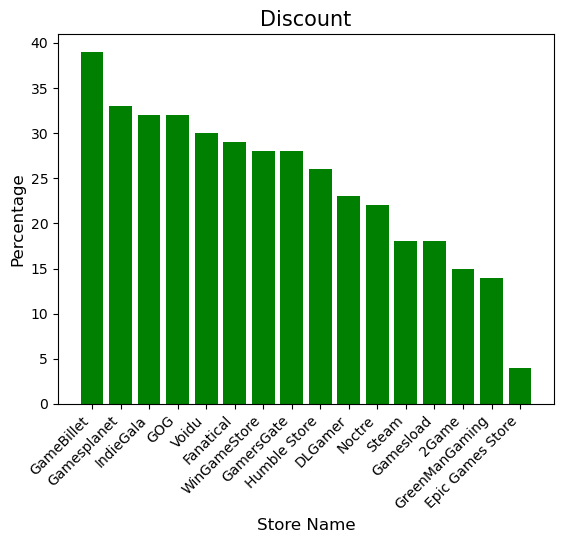

In [7]:
plt.bar(store_sav['storeName'], store_sav['savings'], color="green")
plt.title('Discount',fontsize=15)
plt.xlabel('Store Name',fontsize=12)
plt.ylabel('Percentage',fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.show()

In this bar graph, we can see that GameBillet gives the most discounted games for my entire library at around a 39% discount price. At the other side of the chart, the Epic Game Store provides the least discounts for my library at around 4% discount.

In [8]:
game_sav=library.groupby(['title'])['savings'].mean().sort_values(ascending=False).round().reset_index()
game_sav

,title,savings
0,XCOM 2: War of the Chosen,31.0
1,MONSTER HUNTER RISE,31.0
2,FINAL FANTASY X/X-2 HD Remaster,31.0
3,NieR Replicant ver.1.22474487139...,30.0
4,Persona 5 Royal,28.0
5,MONSTER HUNTER: WORLD,25.0
6,Persona 3 Reload,24.0
7,Persona 4 Golden,21.0
8,Metaphor: ReFantazio,18.0
9,NieR: Automata,17.0


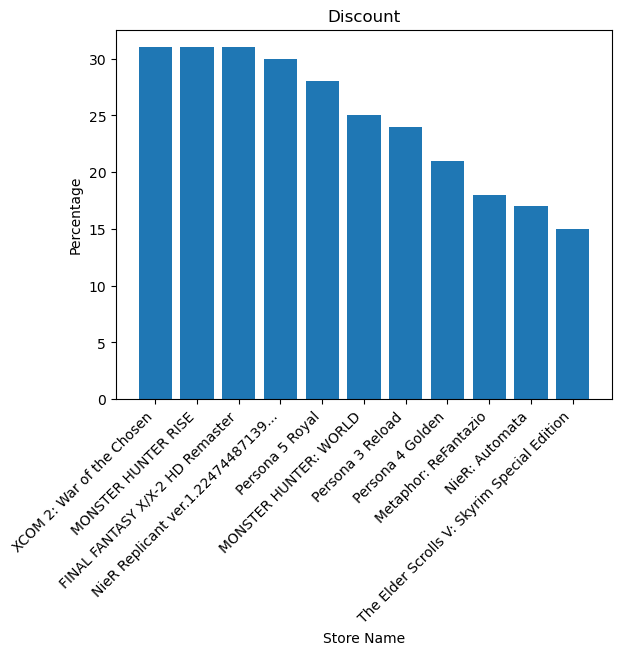

In [9]:
plt.bar(game_sav['title'], game_sav['savings'])
plt.title('Discount')
plt.xlabel('Store Name')
plt.ylabel('Percentage')
plt.xticks(rotation=45, ha='right')
plt.show()

XCOM2, Monster Hunter Rise, and Final Fantasy X were discounted the most during the data collection with about a 31% discount. In the other side, The Elder Scrolls V was the least disounted during this period with average discount of 15%.

In [10]:
game_price=library.groupby(['title'])['price'].mean().sort_values(ascending=False).round(2).reset_index()
game_price

,title,price
0,Metaphor: ReFantazio,57.53
1,Persona 3 Reload,53.15
2,Persona 5 Royal,43.10
3,NieR Replicant ver.1.22474487139...,42.25
4,The Elder Scrolls V: Skyrim Special Edition,33.89
5,NieR: Automata,33.32
6,MONSTER HUNTER RISE,28.39
7,XCOM 2: War of the Chosen,27.51
8,MONSTER HUNTER: WORLD,24.82
9,FINAL FANTASY X/X-2 HD Remaster,20.74


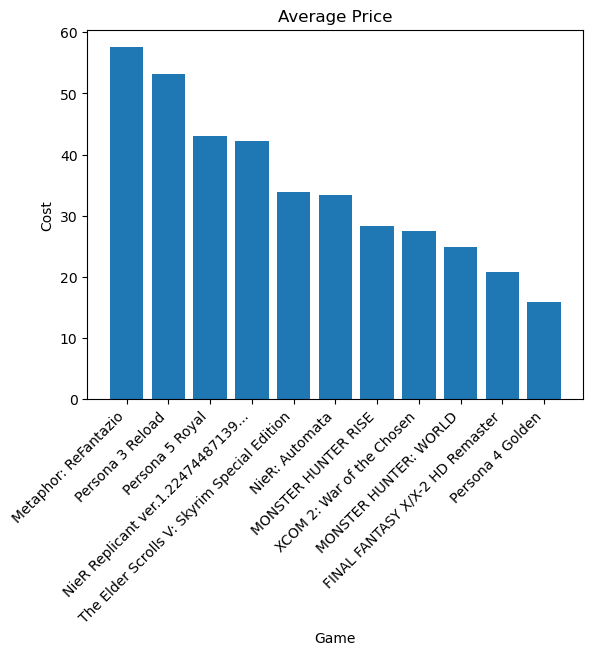

In [11]:
plt.bar(game_price['title'], game_price['price'])
plt.title('Average Price')
plt.xlabel('Game')
plt.ylabel('Cost')
plt.xticks(rotation=45, ha='right')
plt.show()

Discounts usually doesn't mean cheaper price if the game was already cheap on retail. On this graph, we see that Metaphor: ReFantazio was the most expensive game to buy with a price of 57.53 dollars while Persona 4 Golden was the cheapest with a price of 15.89 dollars

In [12]:
date_sav=library.groupby(['Time'])['savings'].mean().sort_values(ascending=False).round().reset_index()

In [13]:
date_sav_top_5=library.groupby(['Time'])['savings'].mean().sort_values(ascending=False).round().reset_index().head(5)
date_sav_top_5

,Time,savings
0,2025-02-02,55.0
1,2025-01-29,50.0
2,2025-01-28,48.0
3,2025-02-04,42.0
4,2025-01-27,42.0


Now we group the data based on the dates. We found that the best day for discounted games was on February 2, 2025 with a 55% discount. The only other day that had a discount of 50% or higher was on January 29, 2025 with a 50% discount. Now, the worst day for discounts was on January 13, 2025 with a 6% discount

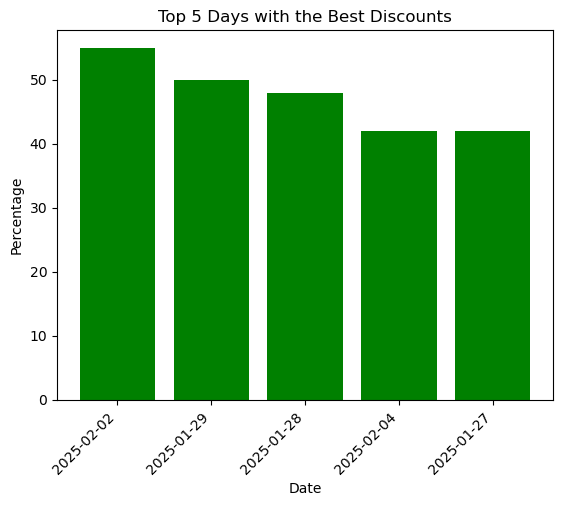

In [14]:
plt.bar(date_sav_top_5['Time'], date_sav_top_5['savings'], color="green")
plt.title('Top 5 Days with the Best Discounts')
plt.xlabel('Date')
plt.ylabel('Percentage')
plt.xticks(rotation=45, ha='right')
plt.show()

In [15]:
date_sav_last_5=library.groupby(['Time'])['savings'].mean().sort_values(ascending=False).round().reset_index().tail(5)
date_sav_last_5

,Time,savings
13,2025-01-18,10.0
14,2025-01-16,9.0
15,2025-01-14,8.0
16,2025-01-15,7.0
17,2025-01-13,6.0


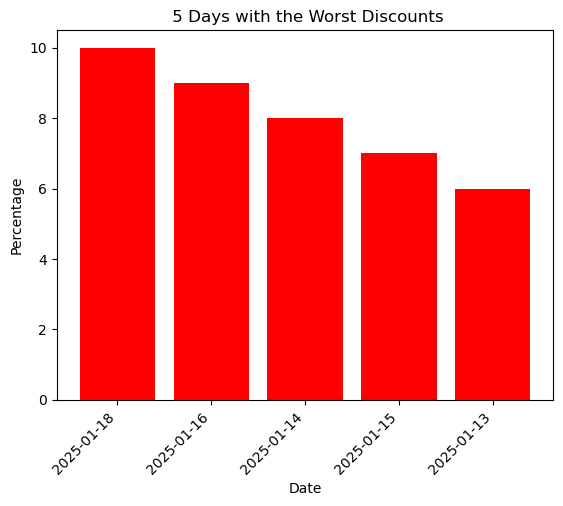

In [16]:
plt.bar(date_sav_last_5['Time'], date_sav_last_5['savings'], color="red")
plt.title(' 5 Days with the Worst Discounts')
plt.xlabel('Date')
plt.ylabel('Percentage')
plt.xticks(rotation=45, ha='right')
plt.show()

In [17]:
date=library.groupby(['Time'])['savings'].mean().round().reset_index()

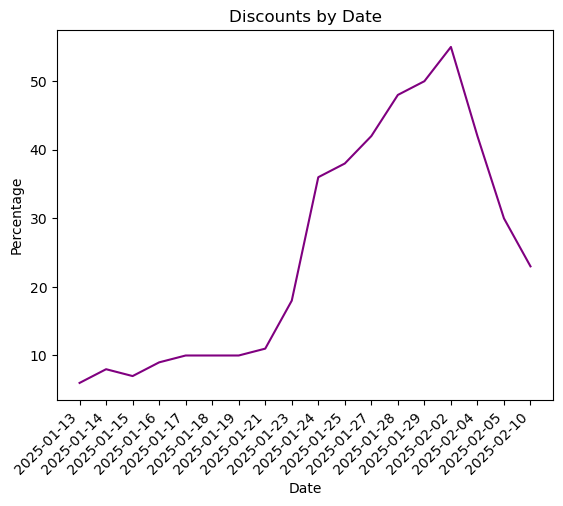

In [18]:
plt.plot(date['Time'], date['savings'], color="purple")
plt.title('Discounts by Date')
plt.xlabel('Date')
plt.ylabel('Percentage')
plt.xticks(rotation=45, ha='right')
plt.show()

## Game Analysis

In this section, I will be going to check each game and answer a few questions.

**Question:**
- On average, which store provides the cheapest price of the game? The most expensive?
- Which day provided the cheapest and most expensive price for these games? 

### XCOM 2: War of the Chosen

**Summary:**

- Expensive Store: Gamesload; \$39.99 
- Cheapest Store: Fanatical; \$19.67
- Most Expensive Day to buy: January 15,2025; \$38.99
- Cheapest Day to buy: February 2, 2025; \$9.41


In [19]:
XCOM2 =library[library['title']=='XCOM 2: War of the Chosen']
XCOM2.head()

,Time,title,steamAppID,storeID,price,retailprice,savings,storeName
11,2025-01-13,XCOM 2: War of the Chosen,NaN,30,39.99,39.99,0.000000,IndieGala
19,2025-01-13,XCOM 2: War of the Chosen,NaN,3,39.99,39.99,0.000000,GreenManGaming
29,2025-01-13,XCOM 2: War of the Chosen,NaN,11,39.99,39.99,0.000000,Humble Store
38,2025-01-13,XCOM 2: War of the Chosen,NaN,23,33.96,39.99,15.078770,GameBillet
46,2025-01-13,XCOM 2: War of the Chosen,NaN,15,35.09,39.99,12.253063,Fanatical


In [31]:
XCOM2_price=XCOM2.groupby(['storeName'])['price'].mean().sort_values(ascending=False).round(2).reset_index()
XCOM2_time=XCOM2.groupby(['Time'])['price'].mean().sort_values(ascending=False).round(2).reset_index()
print(XCOM2_price)
print(XCOM2_time)

         storeName  price
0        Gamesload  39.99
1   GreenManGaming  39.99
2            2Game  31.99
3     Humble Store  31.99
4        IndieGala  27.86
5       GamersGate  25.99
6            Voidu  25.99
7              GOG  25.99
8           Noctre  25.84
9       GameBillet  22.16
10    WinGameStore  20.16
11     Gamesplanet  19.99
12       Fanatical  19.67
          Time  price
0   2025-01-15  38.99
1   2025-01-13  38.61
2   2025-01-14  38.61
3   2025-01-16  38.53
4   2025-01-17  38.53
5   2025-01-18  38.53
6   2025-01-19  38.53
7   2025-01-21  38.53
8   2025-01-23  27.89
9   2025-02-10  25.67
10  2025-02-05  25.66
11  2025-02-04  22.89
12  2025-01-25  14.95
13  2025-01-27  14.95
14  2025-01-24  14.95
15  2025-01-28  14.95
16  2025-01-29  14.95
17  2025-02-02   9.41


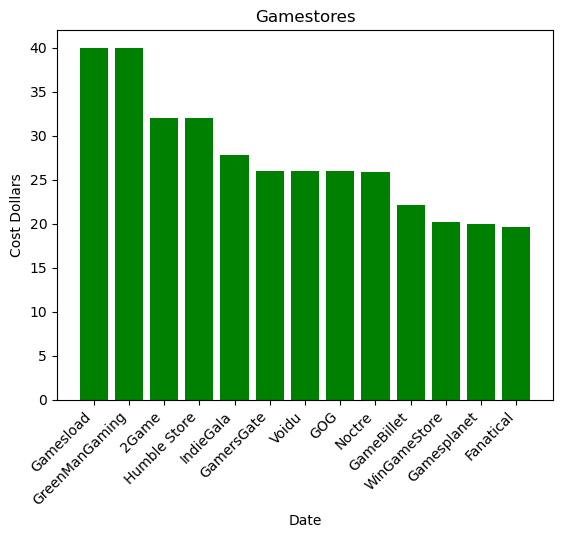

In [32]:
plt.bar(XCOM2_price['storeName'], XCOM2_price['price'], color="green")
plt.title('Gamestores')
plt.xlabel('Date')
plt.ylabel('Cost Dollars')
plt.xticks(rotation=45, ha='right')
plt.show()

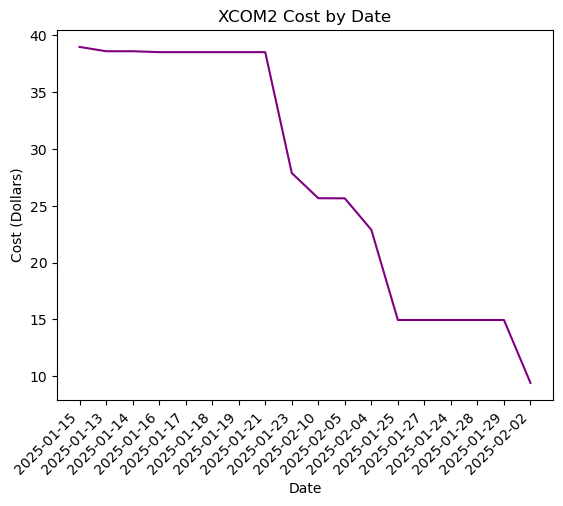

In [35]:
plt.plot(XCOM2_time['Time'], XCOM2_time['price'], color="purple")
plt.title('XCOM2 Cost by Date')
plt.xlabel('Date')
plt.ylabel('Cost (Dollars)')
plt.xticks(rotation=45, ha='right')
plt.show()

### MONSTER HUNTER RISE

**Summary:**

- Expensive Store: 2Game; \$33.33 
- Cheapest Store: GamesPlanet; \$16.50
- Most Expensive Day to buy: January 13,2025; \$38.37
- Cheapest Day to buy: February 2, 2025; \$9.21

In [23]:
MHR =library[library['title']=='MONSTER HUNTER RISE']

MHR_price=MHR.groupby(['storeName'])['price'].mean().sort_values(ascending=False).round(2).reset_index()
MHR_time=MHR.groupby(['Time'])['price'].mean().sort_values(ascending=False).round(2).reset_index()
print(MHR_time)
print(MHR_price)

          Time  price
0   2025-01-13  38.37
1   2025-01-14  36.35
2   2025-01-15  36.35
3   2025-01-16  36.35
4   2025-01-17  36.35
5   2025-01-18  36.35
6   2025-01-19  36.35
7   2025-01-21  35.96
8   2025-01-23  29.50
9   2025-02-10  28.71
10  2025-01-25  27.03
11  2025-01-24  27.03
12  2025-02-05  24.31
13  2025-01-27  22.99
14  2025-02-04  20.39
15  2025-01-28  15.81
16  2025-01-29  13.51
17  2025-02-02   9.21
         storeName  price
0            2Game  33.33
1           Noctre  33.24
2     WinGameStore  32.12
3     Humble Store  31.66
4            Steam  31.66
5        IndieGala  29.82
6   GreenManGaming  29.74
7       GamersGate  29.66
8        Gamesload  28.33
9            Voidu  28.33
10       Fanatical  23.53
11      GameBillet  21.11
12     Gamesplanet  16.50


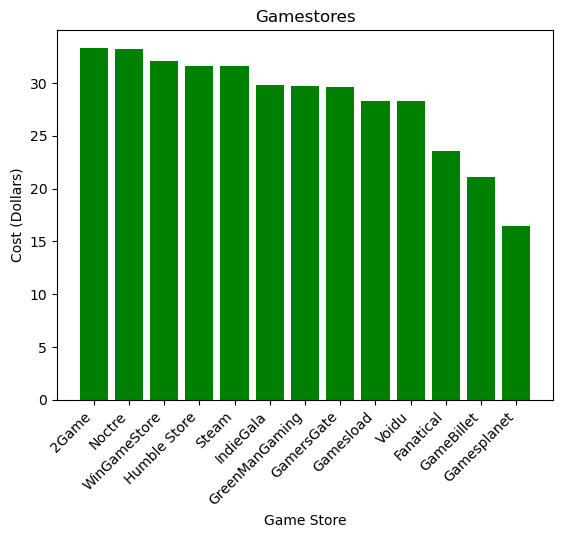

In [24]:
plt.bar(MHR_price['storeName'], MHR_price['price'], color="green")
plt.title('Gamestores')
plt.xlabel('Game Store')
plt.ylabel('Cost (Dollars)')
plt.xticks(rotation=45, ha='right')
plt.show()

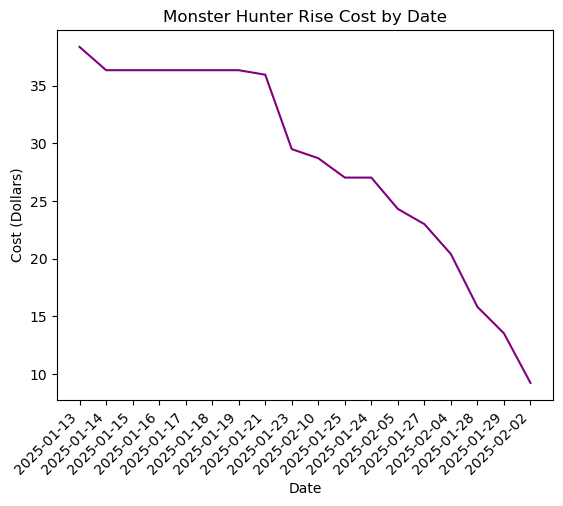

In [29]:
plt.plot(MHR_time['Time'], MHR_time['price'], color="purple")
plt.title('Monster Hunter Rise Cost by Date')
plt.xlabel('Date')
plt.ylabel('Cost (Dollars)')
plt.xticks(rotation=45, ha='right')
plt.show()

### FINAL FANTASY X/X-2 HD Remaster

**Summary:**

- Expensive Store: GreenManGaming; \$28.99 
- Cheapest Store: IndieGala; \$12.98
- Most Expensive Day to buy: January 13,2025; \$25.74
- Cheapest Day to buy: February 5, 2025; \$16.74

In [25]:
FFX =library[library['title']=='FINAL FANTASY X/X-2 HD Remaster']

FFX_price=FFX.groupby(['storeName'])['price'].mean().sort_values(ascending=False).round(2).reset_index()
FFX_time=FFX.groupby(['Time'])['price'].mean().round(2).reset_index()
print(FFX_time)
print(FFX_price)

          Time  price
0   2025-01-13  25.74
1   2025-01-14  25.74
2   2025-01-15  25.74
3   2025-01-16  21.24
4   2025-01-17  21.24
5   2025-01-18  21.24
6   2025-01-19  21.24
7   2025-01-21  21.24
8   2025-01-23  21.24
9   2025-01-24  21.24
10  2025-01-25  21.24
11  2025-01-27  21.24
12  2025-01-28  16.74
13  2025-01-29  16.74
14  2025-02-02  16.74
15  2025-02-04  16.74
16  2025-02-05  16.74
17  2025-02-10  21.24
        storeName  price
0  GreenManGaming  28.99
1           Steam  24.99
2    Humble Store  15.99
3       IndieGala  12.98


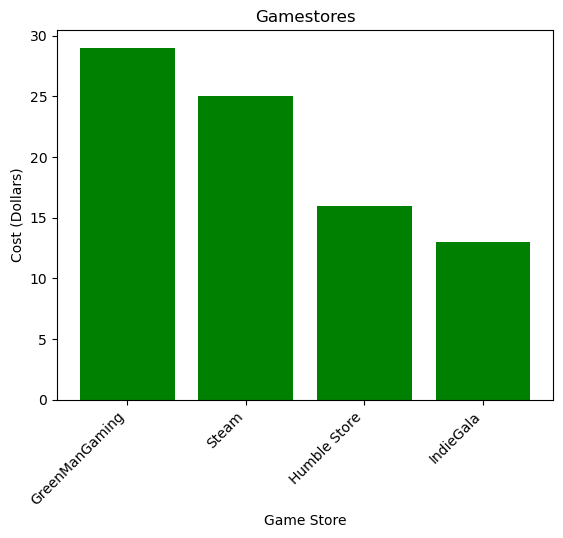

In [26]:
plt.bar(FFX_price['storeName'], FFX_price['price'], color="green")
plt.title('Gamestores')
plt.xlabel('Game Store')
plt.ylabel('Cost (Dollars)')
plt.xticks(rotation=45, ha='right')
plt.show()

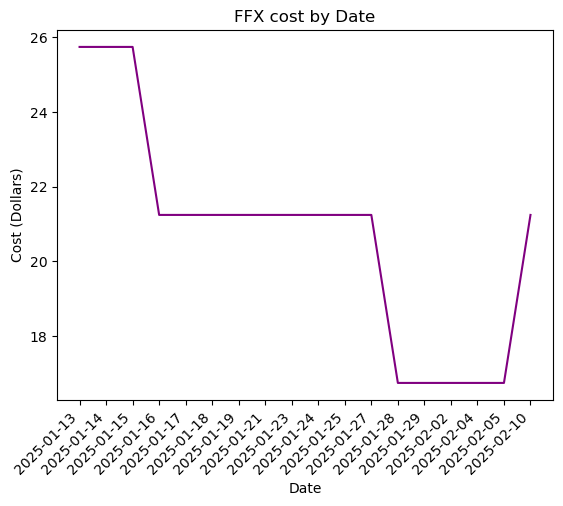

In [27]:
plt.plot(FFX_time['Time'], FFX_time['price'], color="purple")
plt.title('FFX cost by Date')
plt.xlabel('Date')
plt.ylabel('Cost (Dollars)')
plt.xticks(rotation=45, ha='right')
plt.show()

### NieR Replicant ver.1.22474487139...

**Summary:**

- Expensive Store: GreenManGaming; \$52.39
- Cheapest Store: IndieGala; \$34.24
- Most Expensive Day to buy: January 13,2025; \$57.99
- Cheapest Day to buy: February 5, 2025; \$29.01

In [82]:
NR =library[library['title']=='NieR Replicant ver.1.22474487139...']

NR_price=NR.groupby(['storeName'])['price'].mean().sort_values(ascending=False).round(2).reset_index()
NR_time=NR.groupby(['Time'])['price'].mean().round(2).reset_index()
print(NR_time)
print(NR_price)

          Time  price
0   2025-01-13  52.39
1   2025-01-14  52.24
2   2025-01-15  52.24
3   2025-01-16  43.24
4   2025-01-17  43.24
5   2025-01-18  43.24
6   2025-01-19  43.24
7   2025-01-21  43.24
8   2025-01-23  43.24
9   2025-01-24  43.24
10  2025-01-25  43.24
11  2025-01-27  43.24
12  2025-01-28  34.24
13  2025-01-29  34.24
14  2025-02-02  34.24
15  2025-02-04  34.24
16  2025-02-05  34.24
17  2025-02-10  43.24
        storeName  price
0  GreenManGaming  57.99
1           Steam  49.99
2    Humble Store  31.99
3       IndieGala  29.01


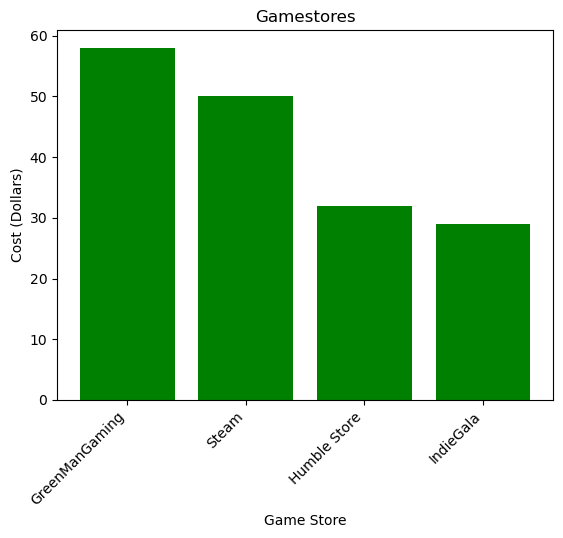

In [72]:
plt.bar(NR_price['storeName'], NR_price['price'], color="green")
plt.title('Gamestores')
plt.xlabel('Game Store')
plt.ylabel('Cost (Dollars)')
plt.xticks(rotation=45, ha='right')
plt.show()

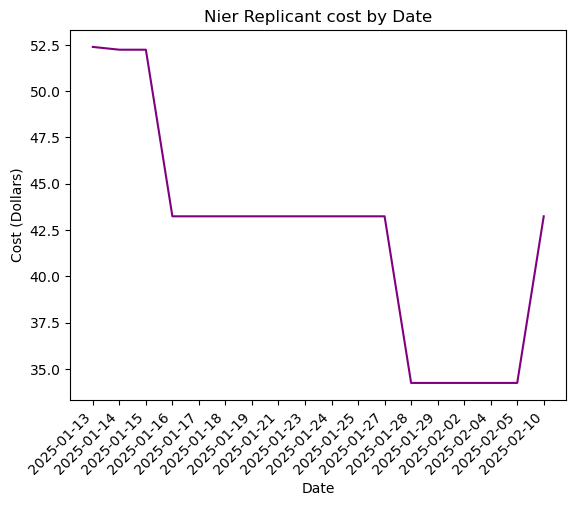

In [83]:
plt.plot(NR_time['Time'], NR_time['price'], color="purple")
plt.title('Nier Replicant cost by Date')
plt.xlabel('Date')
plt.ylabel('Cost (Dollars)')
plt.xticks(rotation=45, ha='right')
plt.show()

### Persona 5 Royal	

**Summary:**

- Expensive Store: 2Game; \$51.99
- Cheapest Store: IndieGala; \$35.90
- Most Expensive Day to buy: January 15,2025; \$56.30
- Cheapest Day to buy: February 5, 2025; \$22.54

In [77]:
P5 =library[library['title']=='Persona 5 Royal']

P5_price=P5.groupby(['storeName'])['price'].mean().sort_values(ascending=False).round(2).reset_index()
P5_time=P5.groupby(['Time'])['price'].mean().round(2).reset_index()
print(P5_time)
print(P5_price)

          Time  price
0   2025-01-13  54.52
1   2025-01-14  54.52
2   2025-01-15  56.30
3   2025-01-16  56.30
4   2025-01-17  56.30
5   2025-01-18  56.30
6   2025-01-19  56.30
7   2025-01-21  52.83
8   2025-01-23  52.83
9   2025-01-24  30.40
10  2025-01-25  26.90
11  2025-01-27  26.90
12  2025-01-28  26.90
13  2025-01-29  26.90
14  2025-02-02  22.54
15  2025-02-04  26.01
16  2025-02-05  42.52
17  2025-02-10  50.52
        storeName  price
0           2Game  51.99
1  GreenManGaming  45.06
2    Humble Store  43.99
3           Steam  43.99
4         DLGamer  43.67
5    WinGameStore  42.43
6     Gamesplanet  41.93
7       Fanatical  38.92
8      GameBillet  35.90


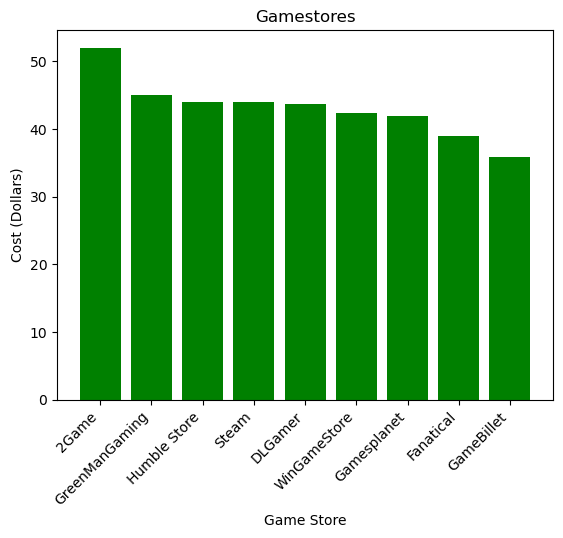

In [73]:
plt.bar(P5_price['storeName'], P5_price['price'], color="green")
plt.title('Gamestores')
plt.xlabel('Game Store')
plt.ylabel('Cost (Dollars)')
plt.xticks(rotation=45, ha='right')
plt.show()

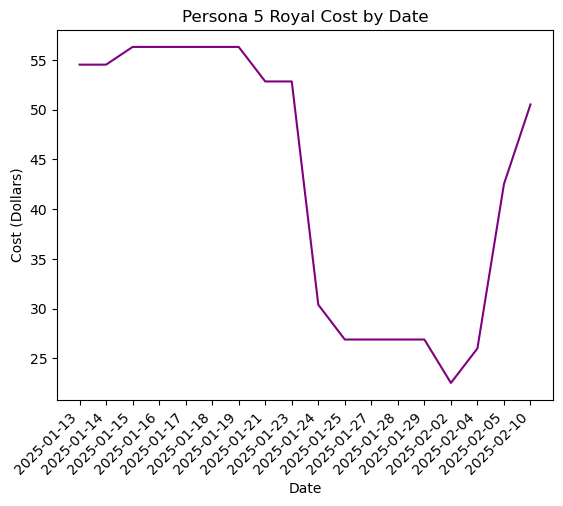

In [95]:
plt.plot(P5_time['Time'], P5_time['price'], color="purple")
plt.title('Persona 5 Royal Cost by Date')
plt.xlabel('Date')
plt.ylabel('Cost (Dollars)')
plt.xticks(rotation=45, ha='right')
plt.show()

### MONSTER HUNTER: WORLD

**Summary:**

- Expensive Store: IndieGala; \$59.99
- Cheapest Store: Gamesplanet; \$15.16
- Most Expensive Day to buy: January 13,2025; \$31.08
- Cheapest Day to buy: February 2, 2025; \$13.23

In [80]:
MHW =library[library['title']=='MONSTER HUNTER: WORLD']

MHW_price=MHW.groupby(['storeName'])['price'].mean().sort_values(ascending=False).round(2).reset_index()
MHW_time=MHW.groupby(['Time'])['price'].mean().round(2).reset_index()
print(MHW_time)
print(MHW_price)

          Time  price
0   2025-01-13  31.08
1   2025-01-14  29.72
2   2025-01-15  29.72
3   2025-01-16  29.72
4   2025-01-17  29.72
5   2025-01-18  29.72
6   2025-01-19  29.72
7   2025-01-21  29.43
8   2025-01-23  25.17
9   2025-01-24  25.05
10  2025-01-25  25.05
11  2025-01-27  22.19
12  2025-01-28  17.64
13  2025-01-29  16.10
14  2025-02-02  13.23
15  2025-02-04  19.18
16  2025-02-05  20.73
17  2025-02-10  23.61
         storeName  price
0        IndieGala  59.99
1            2Game  25.53
2           Noctre  25.46
3     Humble Store  24.41
4            Steam  24.41
5       GamersGate  22.96
6   GreenManGaming  22.64
7     WinGameStore  22.27
8        Gamesload  22.18
9            Voidu  22.18
10       Fanatical  18.74
11      GameBillet  16.74
12     Gamesplanet  15.16


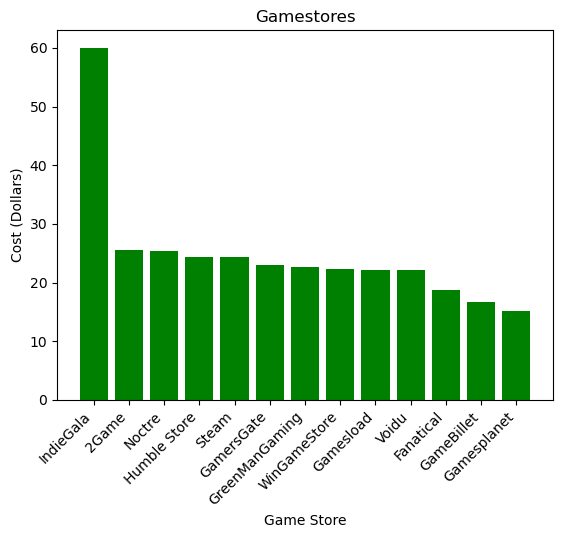

In [78]:
plt.bar(MHW_price['storeName'], MHW_price['price'], color="green")
plt.title('Gamestores')
plt.xlabel('Game Store')
plt.ylabel('Cost (Dollars)')
plt.xticks(rotation=45, ha='right')
plt.show()

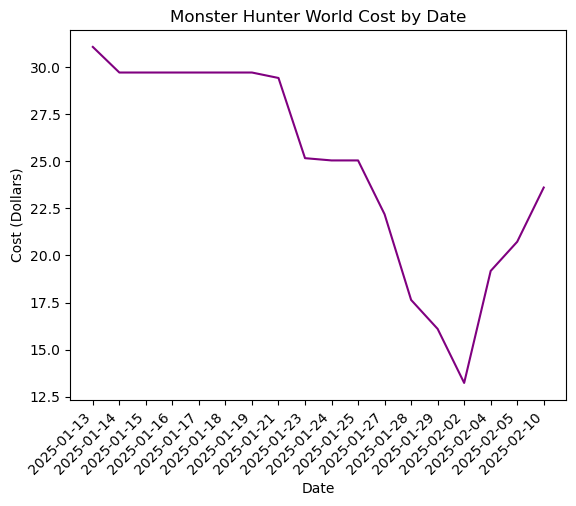

In [96]:
plt.plot(MHW_time['Time'], MHW_time['price'], color="purple")
plt.title('Monster Hunter World Cost by Date')
plt.xlabel('Date')
plt.ylabel('Cost (Dollars)')
plt.xticks(rotation=45, ha='right')
plt.show()

### Persona 3 Reload

**Summary:**

- Expensive Store: 2Game; \$56.38
- Cheapest Store: GamesBillet; \$49.73
- Most Expensive Day to buy: January 13,2025; \$65.93
- Cheapest Day to buy: February 2, 2025; \$32.88

In [86]:
P3 =library[library['title']=='Persona 3 Reload']

P3_price=P3.groupby(['storeName'])['price'].mean().sort_values(ascending=False).round(2).reset_index()
P3_time=P3.groupby(['Time'])['price'].mean().round(2).reset_index()
print(P3_time)
print(P3_price)

          Time  price
0   2025-01-13  65.93
1   2025-01-14  65.93
2   2025-01-15  65.93
3   2025-01-16  65.93
4   2025-01-17  65.93
5   2025-01-18  65.93
6   2025-01-19  65.93
7   2025-01-21  65.93
8   2025-01-23  65.93
9   2025-01-24  40.62
10  2025-01-25  37.29
11  2025-01-27  33.40
12  2025-01-28  33.40
13  2025-01-29  33.40
14  2025-02-02  32.88
15  2025-02-04  36.10
16  2025-02-05  54.26
17  2025-02-10  62.04
        storeName  price
0           2Game  56.38
1  GreenManGaming  55.02
2    Humble Store  54.43
3           Steam  54.43
4         DLGamer  53.19
5    WinGameStore  52.66
6     Gamesplanet  51.32
7       Fanatical  51.21
8      GameBillet  49.73


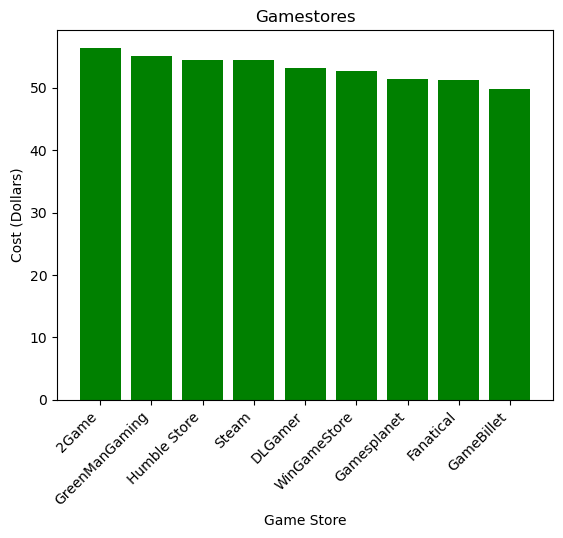

In [84]:
plt.bar(P3_price['storeName'], P3_price['price'], color="green")
plt.title('Gamestores')
plt.xlabel('Game Store')
plt.ylabel('Cost (Dollars)')
plt.xticks(rotation=45, ha='right')
plt.show()

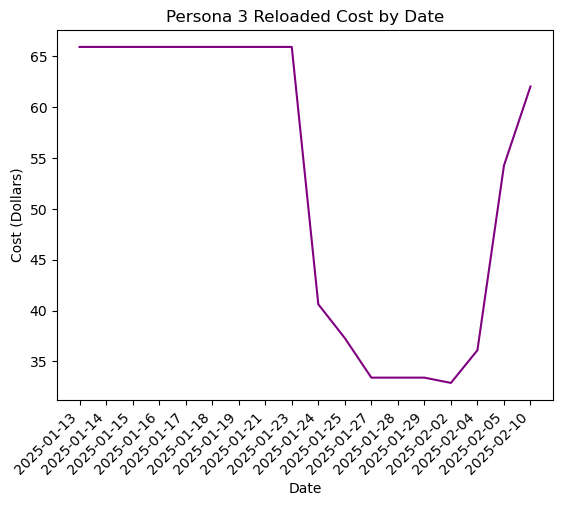

In [97]:
plt.plot(P3_time['Time'], P3_time['price'], color="purple")
plt.title('Persona 3 Reloaded Cost by Date')
plt.xlabel('Date')
plt.ylabel('Cost (Dollars)')
plt.xticks(rotation=45, ha='right')
plt.show()

### Persona 4 Golden

**Summary:**

- Expensive Store: 2Game; \$16.88
- Cheapest Store: GamesBillet; \$14.72
- Most Expensive Day to buy: January 18,2025; \$18.94
- Cheapest Day to buy: February 2, 2025; \$11.28

In [89]:
P4 =library[library['title']=='Persona 4 Golden']

P4_price=P4.groupby(['storeName'])['price'].mean().sort_values(ascending=False).round(2).reset_index()
P4_time=P4.groupby(['Time'])['price'].mean().round(2).reset_index()
print(P4_time)
print(P4_price)

          Time  price
0   2025-01-13  18.92
1   2025-01-14  18.92
2   2025-01-15  18.92
3   2025-01-16  18.92
4   2025-01-17  18.92
5   2025-01-18  18.94
6   2025-01-19  18.94
7   2025-01-21  18.12
8   2025-01-23  18.12
9   2025-01-24  13.07
10  2025-01-25  12.35
11  2025-01-27  11.46
12  2025-01-28  11.46
13  2025-01-29  11.28
14  2025-02-02  11.28
15  2025-02-04  12.09
16  2025-02-05  16.27
17  2025-02-10  18.05
        storeName  price
0           2Game  16.88
1    Humble Store  16.43
2           Steam  16.43
3  GreenManGaming  16.41
4    WinGameStore  16.08
5         DLGamer  15.76
6     Gamesplanet  15.46
7      GameBillet  14.85
8       Fanatical  14.72


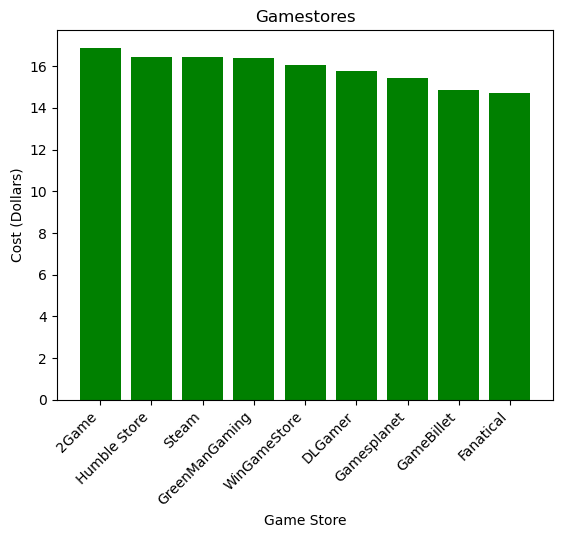

In [88]:
plt.bar(P4_price['storeName'], P4_price['price'], color="green")
plt.title('Gamestores')
plt.xlabel('Game Store')
plt.ylabel('Cost (Dollars)')
plt.xticks(rotation=45, ha='right')
plt.show()

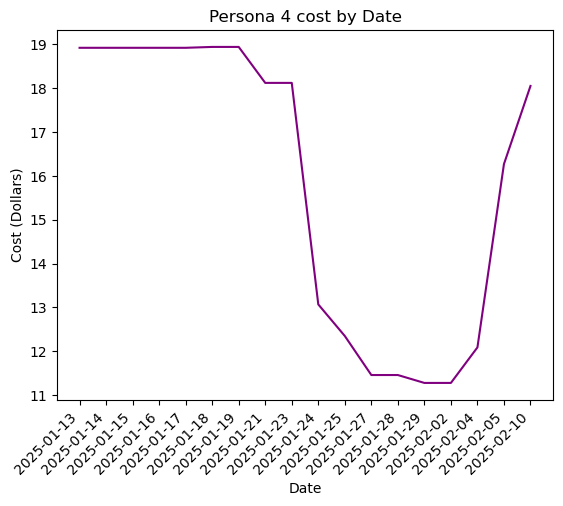

In [91]:
plt.plot(P4_time['Time'], P4_time['price'], color="purple")
plt.title('Persona 4 cost by Date')
plt.xlabel('Date')
plt.ylabel('Cost (Dollars)')
plt.xticks(rotation=45, ha='right')
plt.show()

### Metaphor: ReFantazio

**Summary:**

- Expensive Store: Fanatical; \$60.89
- Cheapest Store: GamesBillet; \$51.81
- Most Expensive Day to buy: January 13-16,2025; \$64.96
- Cheapest Day to buy: February 2, 2025; \$45.32

In [102]:
metaphor =library[library['title']=='Metaphor: ReFantazio']

metaphor_price=Metaphor.groupby(['storeName'])['price'].mean().sort_values(ascending=False).round(2).reset_index()
metaphor_time=Metaphor.groupby(['Time'])['price'].mean().round(2).reset_index()
print(Metaphor_time)
print(Metaphor_price)

          Time  price
0   2025-01-13  64.96
1   2025-01-14  64.96
2   2025-01-15  64.96
3   2025-01-16  64.96
4   2025-01-17  64.68
5   2025-01-18  64.68
6   2025-01-19  64.68
7   2025-01-21  63.05
8   2025-01-23  62.97
9   2025-02-10  61.19
10  2025-02-05  56.99
11  2025-01-24  53.07
12  2025-01-25  48.04
13  2025-01-27  48.04
14  2025-01-28  48.04
15  2025-01-29  48.04
16  2025-02-04  47.74
17  2025-02-02  45.32
        storeName  price
0       Fanatical  60.89
1    Humble Store  60.66
2           Steam  60.66
3  GreenManGaming  59.92
4    WinGameStore  56.46
5         DLGamer  56.46
6     Gamesplanet  56.38
7           2Game  55.14
8       IndieGala  54.19
9      GameBillet  51.81


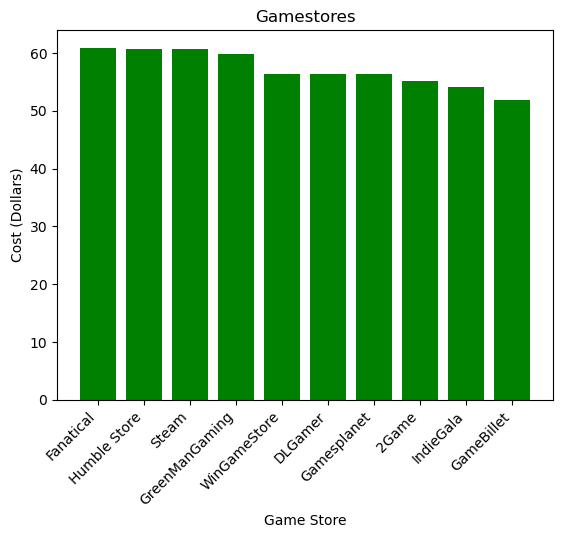

In [100]:
plt.bar(metaphor_price['storeName'], metaphor_price['price'], color="green")
plt.title('Gamestores')
plt.xlabel('Game Store')
plt.ylabel('Cost (Dollars)')
plt.xticks(rotation=45, ha='right')
plt.show()

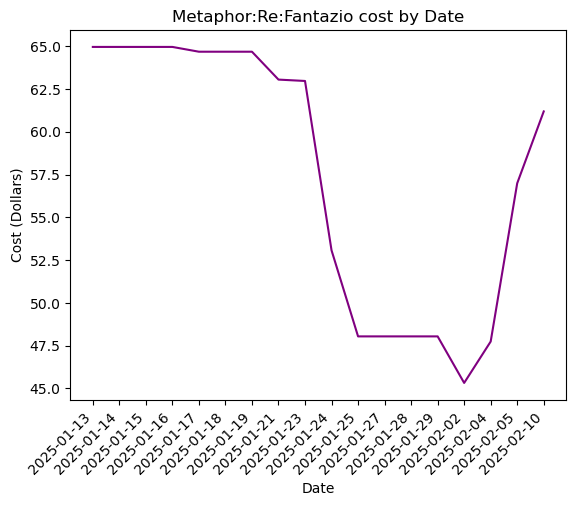

In [108]:
plt.plot(metaphor_time['Time'], metaphor_time['price'], color="purple")
plt.title('Metaphor:Re:Fantazio cost by Date')
plt.xlabel('Date')
plt.ylabel('Cost (Dollars)')
plt.xticks(rotation=45, ha='right')
plt.show()

### NieR: Automata

- Store: Steam \$33.32
- Most Expensive Day to buy: January 13-29,2025; \$39.99
- Cheapest Day to buy: February 2, 2025; \$15.99

In [106]:
NA =library[library['title']=='NieR: Automata']

NA_price=NA.groupby(['storeName'])['price'].mean().sort_values(ascending=False).round(2).reset_index()
NA_time=NA.groupby(['Time'])['price'].mean().round(2).reset_index()
print(NA_time)
print(NA_price)

          Time  price
0   2025-01-13  39.99
1   2025-01-14  39.99
2   2025-01-15  39.99
3   2025-01-16  39.99
4   2025-01-17  39.99
5   2025-01-18  39.99
6   2025-01-19  39.99
7   2025-01-21  39.99
8   2025-01-23  39.99
9   2025-01-24  39.99
10  2025-01-25  39.99
11  2025-01-27  39.99
12  2025-01-28  15.99
13  2025-01-29  15.99
14  2025-02-02  15.99
15  2025-02-04  15.99
16  2025-02-05  15.99
17  2025-02-10  39.99
  storeName  price
0     Steam  33.32


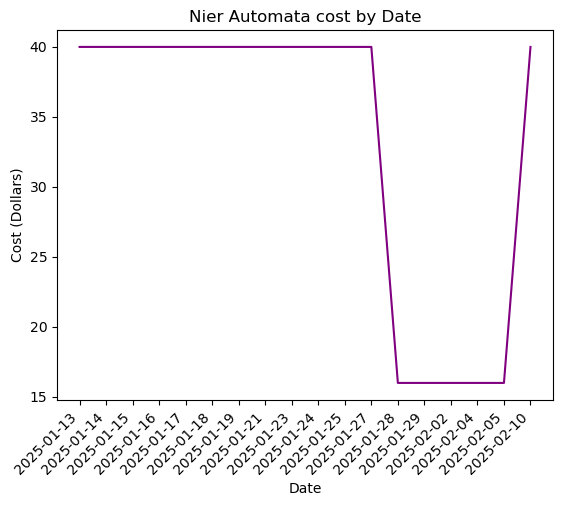

In [107]:
plt.plot(NA_time['Time'], NA_time['price'], color="purple")
plt.title('Nier Automata cost by Date')
plt.xlabel('Date')
plt.ylabel('Cost (Dollars)')
plt.xticks(rotation=45, ha='right')
plt.show()

### The Elder Scrolls V: Skyrim Special Edition

- Store: Steam \$33.32
- Most Expensive Day to buy: January 13-29,2025; \$39.99
- Cheapest Day to buy: February 2, 2025; \$15.99

In [111]:
S5 =library[library['title']=='The Elder Scrolls V: Skyrim Special Edition']

S5_price=NA.groupby(['storeName'])['price'].mean().sort_values(ascending=False).round(2).reset_index()
S5_time=NA.groupby(['Time'])['price'].mean().round(2).reset_index()
print(S5_time)
print(S5_price)

          Time  price
0   2025-01-13  39.99
1   2025-01-14  39.99
2   2025-01-15  39.99
3   2025-01-16  39.99
4   2025-01-17  39.99
5   2025-01-18  39.99
6   2025-01-19  39.99
7   2025-01-21  39.99
8   2025-01-23  39.99
9   2025-01-24  39.99
10  2025-01-25  39.99
11  2025-01-27  39.99
12  2025-01-28  15.99
13  2025-01-29  15.99
14  2025-02-02  15.99
15  2025-02-04  15.99
16  2025-02-05  15.99
17  2025-02-10  39.99
  storeName  price
0     Steam  33.32


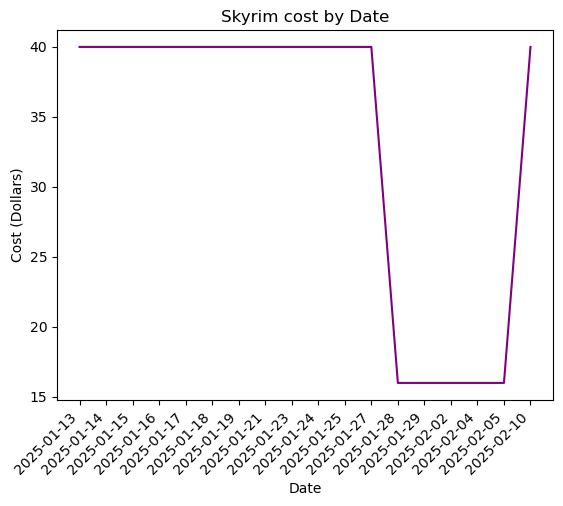

In [112]:
plt.plot(S5_time['Time'], S5_time['price'], color="purple")
plt.title('Skyrim cost by Date')
plt.xlabel('Date')
plt.ylabel('Cost (Dollars)')
plt.xticks(rotation=45, ha='right')
plt.show()

## Final insights

If we buy the entire library of games in the data on the cheapeast store, it will cost 304.83 dollars compared to the most expensive stores at 467.47 dollars. We could save about \$169.31 which can be around 2 extra price games you could get. 

Now, if we buy the games at their cheapest day, the library would cost \$234.12 which is cheaper than focusing on the game store. In the other side, if we buy games on the days there the most expensive, the cost would be 478.28 dollars. We can save up to 244.16 dollars which is an insane amount of money we can use for other things.


## Final Words

This was a fun project to work on 